In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential

In [ ]:
MSC_data_South_America = pd.read_csv('/content/MSC_data_South_America.csv')

In [ ]:
MSC_data_South_America.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110154 entries, 0 to 110153
Data columns (total 11 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   commodity__code                          110154 non-null  int64 
 1   measure__sid                             110154 non-null  int64 
 2   measure__type__description               110154 non-null  object
 3   commodity__indent                        110154 non-null  int64 
 4   commodity__suffix                        110154 non-null  int64 
 5   commodity__validity_start                110154 non-null  object
 6   commodity__sid                           110154 non-null  int64 
 7   commodity__description                   110154 non-null  object
 8   measure__geographical_area__sid          110154 non-null  int64 
 9   measure__geographical_area__description  110154 non-null  object
 10  measure__duty_expression                 110

In [ ]:
MSC_data_South_America['commodity__code'] = MSC_data_South_America['commodity__code'].astype('int32')
MSC_data_South_America['measure__sid'] = MSC_data_South_America['measure__sid'].astype('int32')
MSC_data_South_America['commodity__indent'] = MSC_data_South_America['commodity__indent'].astype('int32')
MSC_data_South_America['commodity__suffix'] = MSC_data_South_America['commodity__suffix'].astype('int32')
MSC_data_South_America['commodity__sid'] = MSC_data_South_America['commodity__sid'].astype('int32')
MSC_data_South_America['measure__geographical_area__sid'] = MSC_data_South_America['measure__geographical_area__sid'].astype('int32')
MSC_data_South_America['measure__duty_expression'] = MSC_data_South_America['measure__duty_expression'].astype('str')

In [ ]:
MSC_data_South_America.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110154 entries, 0 to 110153
Data columns (total 11 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   commodity__code                          110154 non-null  int32 
 1   measure__sid                             110154 non-null  int32 
 2   measure__type__description               110154 non-null  object
 3   commodity__indent                        110154 non-null  int32 
 4   commodity__suffix                        110154 non-null  int32 
 5   commodity__validity_start                110154 non-null  object
 6   commodity__sid                           110154 non-null  int32 
 7   commodity__description                   110154 non-null  object
 8   measure__geographical_area__sid          110154 non-null  int32 
 9   measure__geographical_area__description  110154 non-null  object
 10  measure__duty_expression                 110

In [ ]:
MSC_data_South_America['measure__geographical_area__description'].unique()

array(['Chile', 'Colombia', 'Ecuador', 'Peru', 'Argentina', 'Brazil',
       'Uruguay'], dtype=object)

In [ ]:
# Extract and convert percentages, ignoring non-percentage components
MSC_data_South_America['measure__duty_expression'] = (
    MSC_data_South_America['measure__duty_expression']
    .str.extract(r'(\d+)%')  # Extract the number before '%'
    .astype(float) / 100  # Convert to float, handle non-numeric with 'ignore'
).fillna(0)

In [ ]:
MSC_data_South_America['measure__duty_expression'].unique()

array([0.  , 0.2 , 0.04, 0.02, 0.05, 0.06, 0.08, 0.09, 0.03, 0.07, 0.01,
       0.3 ])

In [ ]:
MSC_data_South_America['commodity__validity_start'] = pd.to_datetime(MSC_data_South_America['commodity__validity_start'])

In [ ]:
MSC_data_South_America['commodity__validity_year'] = pd.to_datetime(MSC_data_South_America['commodity__validity_start']).dt.year


In [ ]:
MSC_data_South_America.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110154 entries, 0 to 110153
Data columns (total 12 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   commodity__code                          110154 non-null  int32         
 1   measure__sid                             110154 non-null  int32         
 2   measure__type__description               110154 non-null  object        
 3   commodity__indent                        110154 non-null  int32         
 4   commodity__suffix                        110154 non-null  int32         
 5   commodity__validity_start                110154 non-null  datetime64[ns]
 6   commodity__sid                           110154 non-null  int32         
 7   commodity__description                   110154 non-null  object        
 8   measure__geographical_area__sid          110154 non-null  int32         
 9   measure__geographical_area

In [ ]:
MSC_data_South_America['measure__geographical_area__description'].unique()

array(['Chile', 'Colombia', 'Ecuador', 'Peru', 'Argentina', 'Brazil',
       'Uruguay'], dtype=object)

In [ ]:
MSC_data_South_America_United_States = MSC_data_South_America[MSC_data_South_America['measure__geographical_area__description'].isin(['Chile', 'Colombia', 'Ecuador', 'Peru', 'Argentina', 'Brazil', 'Uruguay'])]


# ***Data visualization***

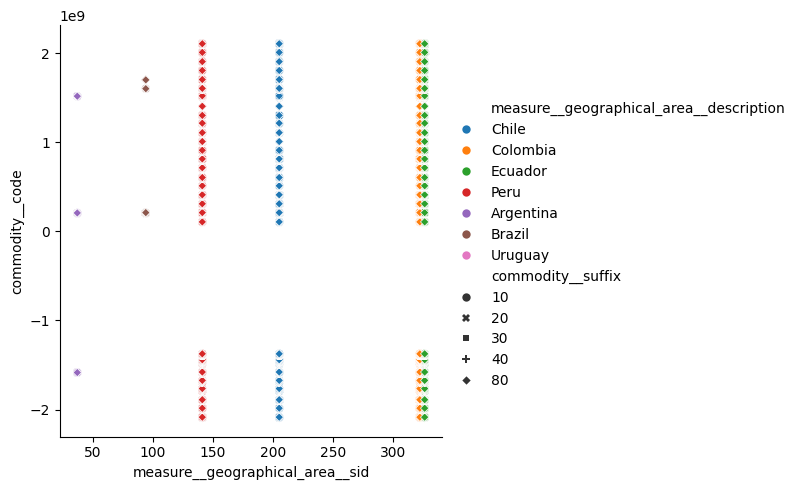

In [ ]:

sns.relplot(data = MSC_data_South_America_United_States, kind = 'scatter', x = 'measure__geographical_area__sid', y = 'commodity__code', hue = 'measure__geographical_area__description', style = 'commodity__suffix' )

(array([30021.,     0.,     0.,   539.,  8153.,  6147.,  5097., 35470.,
        15292.,  9435.]),
 array([1972. , 1977.2, 1982.4, 1987.6, 1992.8, 1998. , 2003.2, 2008.4,
        2013.6, 2018.8, 2024. ]),
 <BarContainer object of 10 artists>)

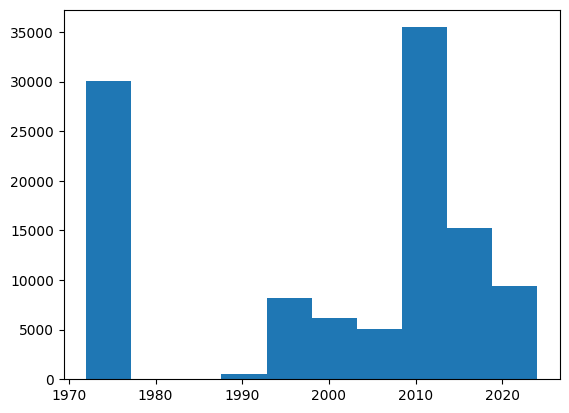

In [ ]:
plt.hist(MSC_data_South_America['commodity__validity_year'])

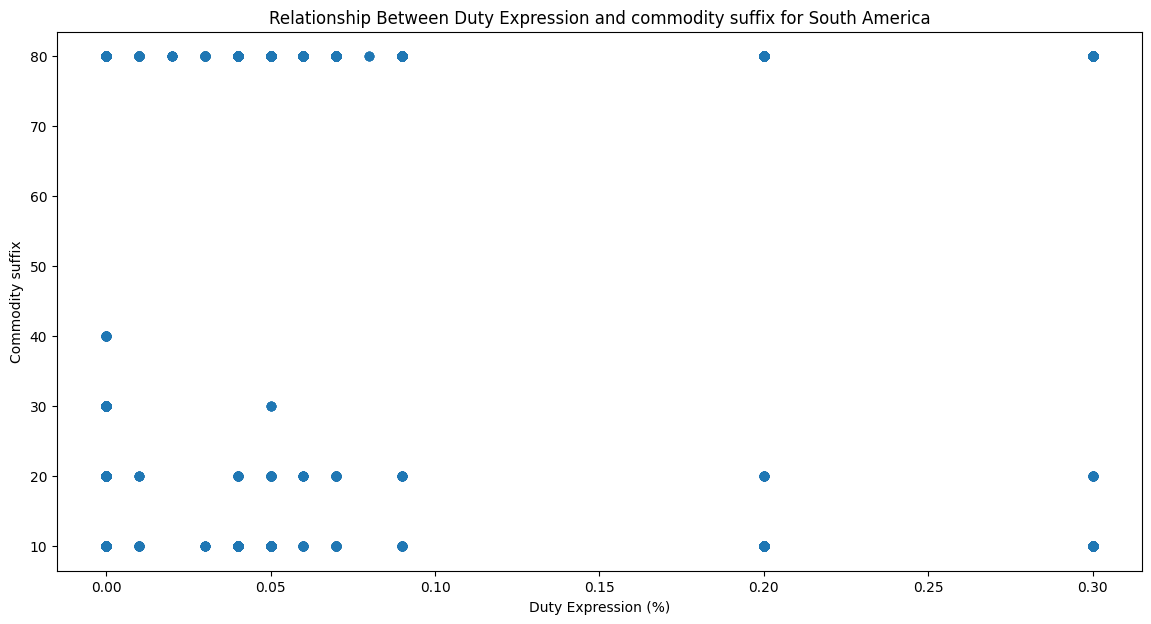

In [ ]:
#  Relationship between trade value and another metric (e.g., duty expression)
plt.figure(figsize=(14, 7))
plt.scatter(MSC_data_South_America['measure__duty_expression'], MSC_data_South_America['commodity__suffix'])
plt.title('Relationship Between Duty Expression and commodity suffix for South America')
plt.xlabel('Duty Expression (%)')
plt.ylabel('Commodity suffix')
plt.show()

<Axes: >

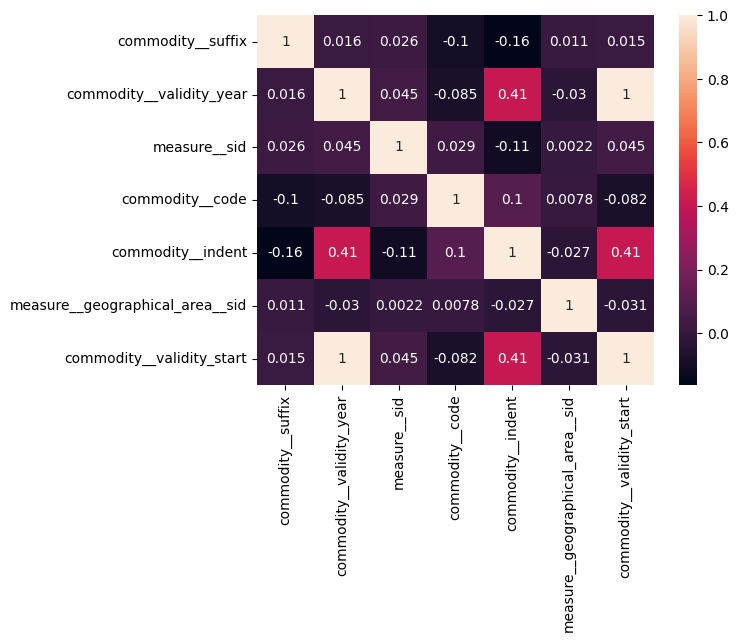

In [ ]:
sns.heatmap(MSC_data_South_America[['commodity__suffix','commodity__validity_year', 'measure__sid', 'commodity__code', 'commodity__indent', 'measure__geographical_area__sid','commodity__validity_start']].corr(),annot = True)

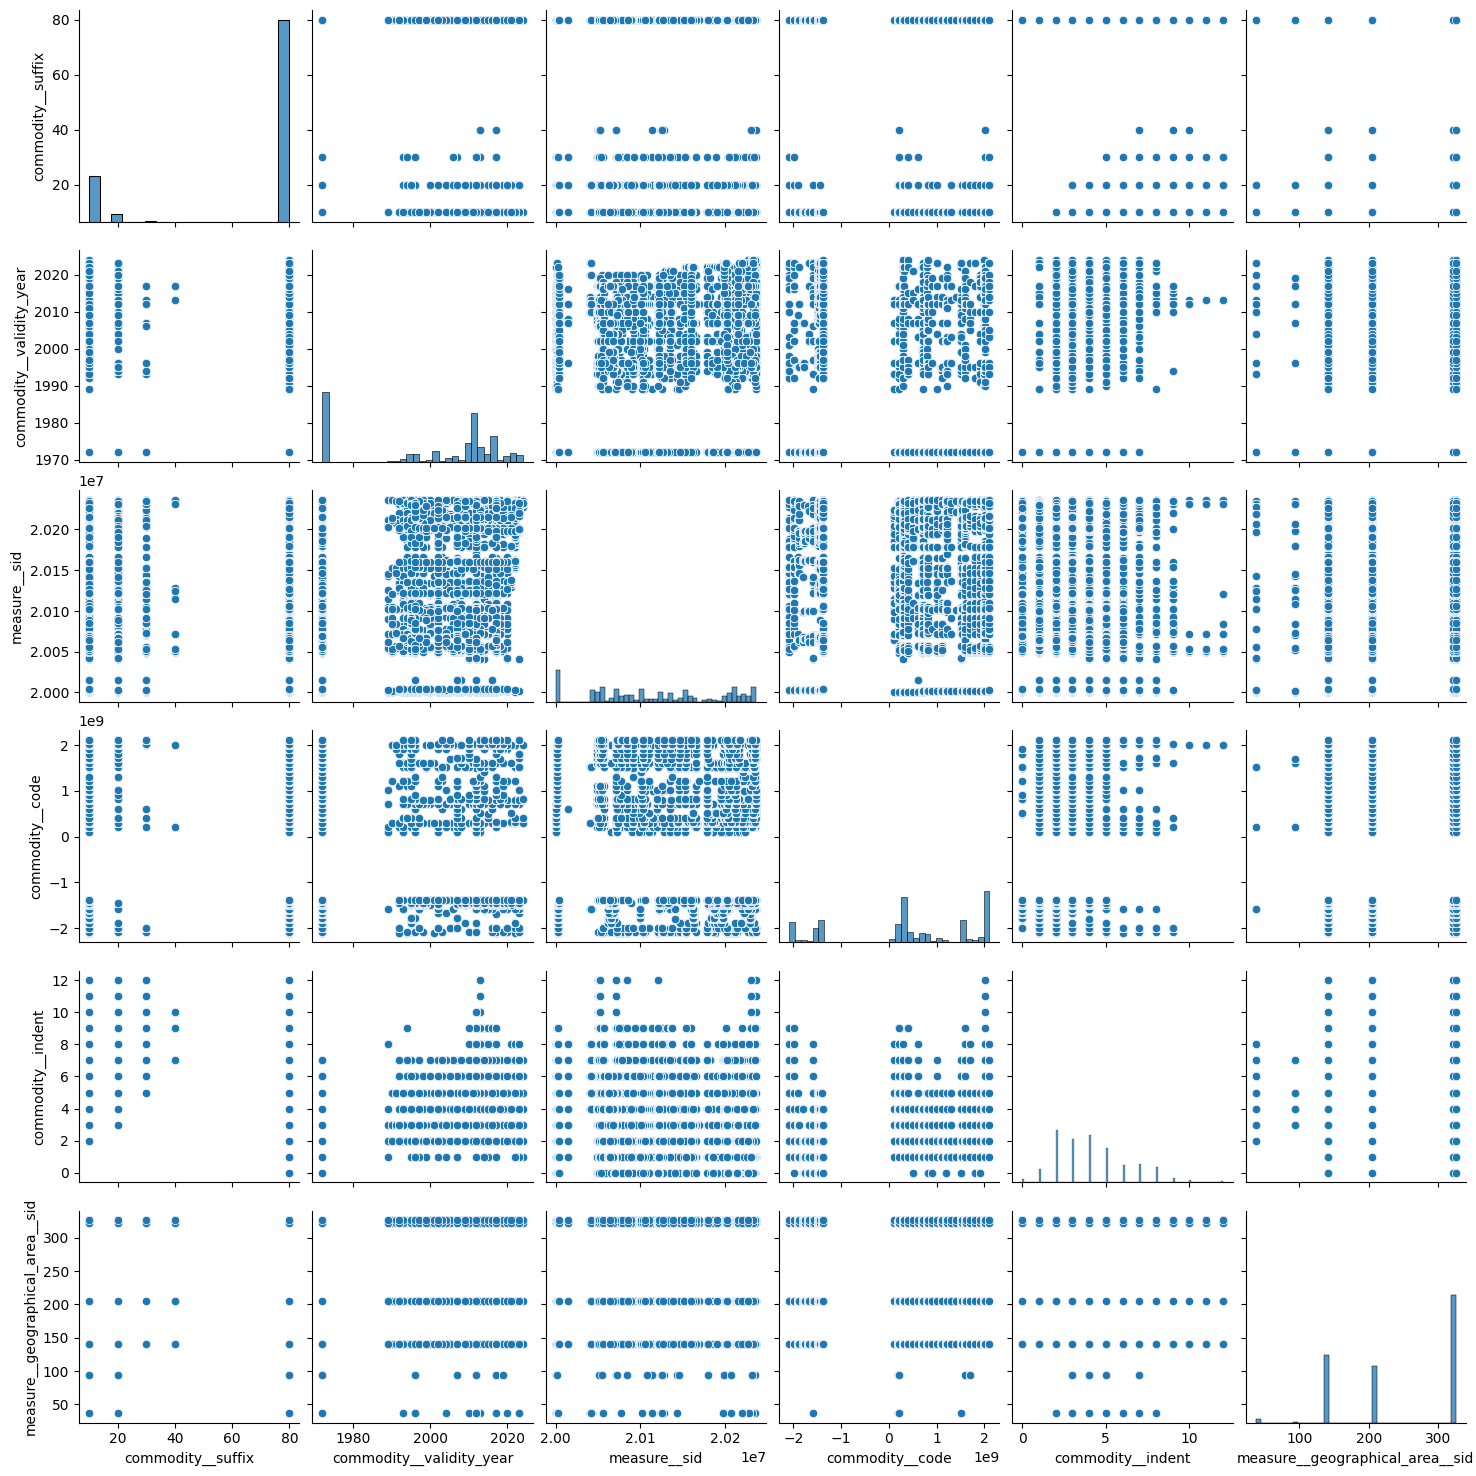

In [ ]:
sns.pairplot(MSC_data_South_America[['commodity__suffix','commodity__validity_year', 'measure__sid', 'commodity__code', 'commodity__indent', 'measure__geographical_area__sid','commodity__validity_start']])


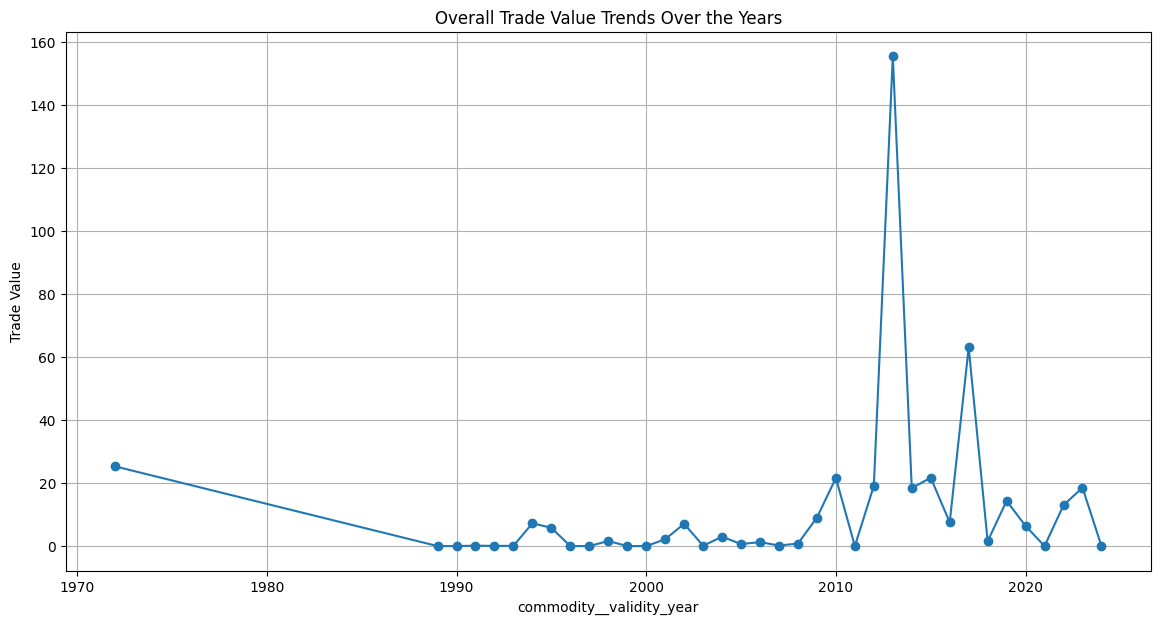

In [ ]:
MSC_data_South_America['commodity__validity_year'] = pd.to_datetime(MSC_data_South_America['commodity__validity_year'], format='%Y')

#Line Chart - Overall trade value trends over the years
annual_trade_value = MSC_data_South_America.groupby(MSC_data_South_America['commodity__validity_year'].dt.year)['measure__duty_expression'].sum()

plt.figure(figsize=(14, 7))
plt.plot(annual_trade_value.index, annual_trade_value.values, marker='o')
plt.title('Overall Trade Value Trends Over the Years')
plt.xlabel('commodity__validity_year')
plt.ylabel('Trade Value')
plt.grid(True)
plt.show()

In [ ]:
if 'commodity__validity_year' in MSC_data_South_America.columns:
    MSC_data_South_America['commodity__validity_year'] = pd.to_datetime(MSC_data_South_America['commodity__validity_year'], format='%Y')

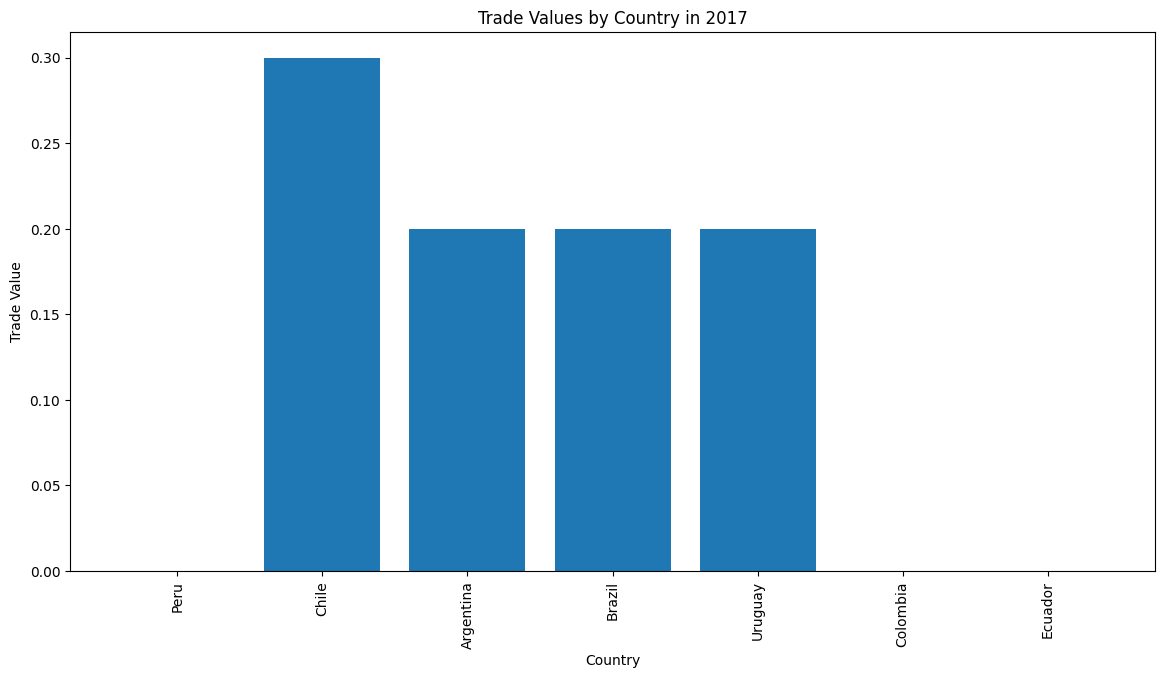

In [ ]:
# 2. Bar Chart: Trade values by country for a specific year
specific_year = 2017
year_data = MSC_data_South_America[MSC_data_South_America['commodity__validity_year'].dt.year == specific_year]
plt.figure(figsize=(14, 7))
plt.bar(year_data['measure__geographical_area__description'], year_data['measure__duty_expression'])
plt.title(f'Trade Values by Country in {specific_year}')
plt.xlabel('Country')
plt.ylabel('Trade Value')
plt.xticks(rotation=90)
plt.show()

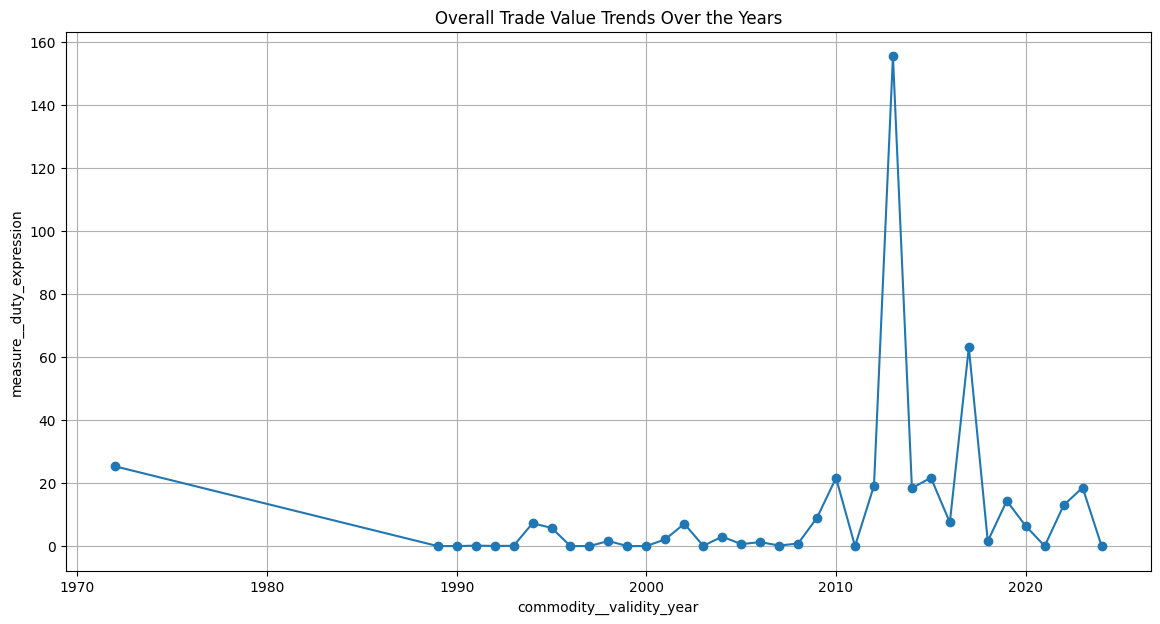

In [ ]:
# 1. Line Chart: Overall trade value trends over the years
annual_trade_value = MSC_data_South_America.groupby(MSC_data_South_America['commodity__validity_year'].dt.year)['measure__duty_expression'].sum()

plt.figure(figsize=(14, 7))
plt.plot(annual_trade_value.index, annual_trade_value.values, marker='o')
plt.title('Overall Trade Value Trends Over the Years')
plt.xlabel('commodity__validity_year')
plt.ylabel('measure__duty_expression')
plt.grid(True)
plt.show()

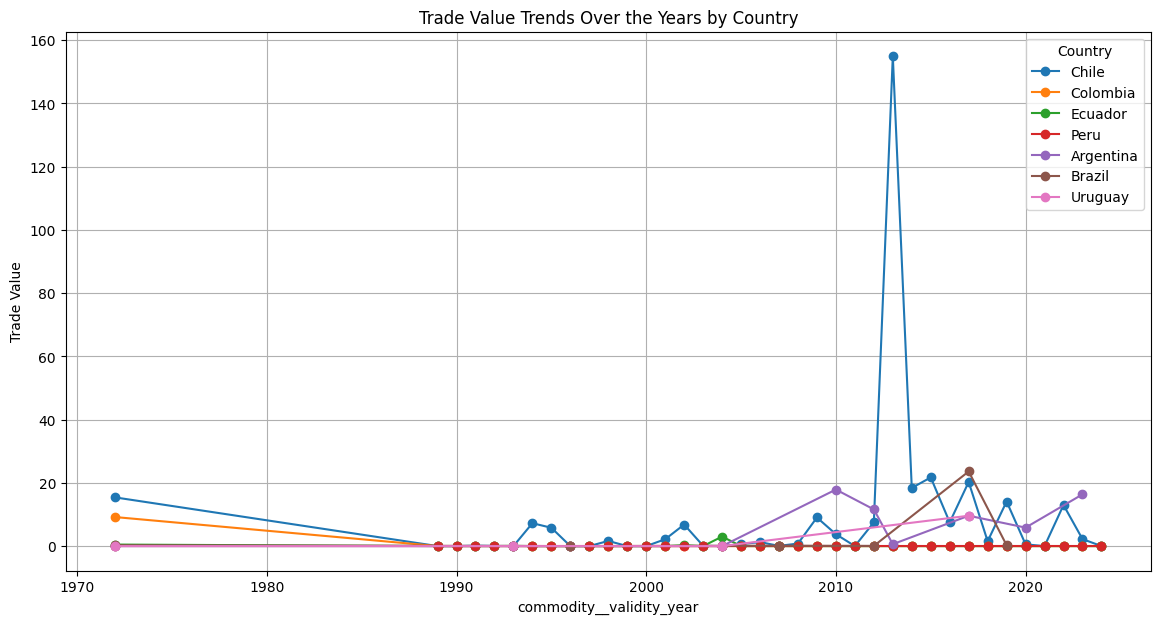

In [ ]:
# 1. Line Chart: Trade value trends over the years for each country
plt.figure(figsize=(14, 7))
for country in MSC_data_South_America['measure__geographical_area__description'].unique():
    country_data = MSC_data_South_America[MSC_data_South_America['measure__geographical_area__description'] == country]
    annual_trade_value = country_data.groupby(country_data['commodity__validity_year'].dt.year)['measure__duty_expression'].sum()
    plt.plot(annual_trade_value.index, annual_trade_value.values, marker='o', label=country)
plt.title('Trade Value Trends Over the Years by Country')
plt.xlabel('commodity__validity_year')
plt.ylabel('Trade Value')
plt.legend(title='Country')
plt.grid(True)
plt.show()

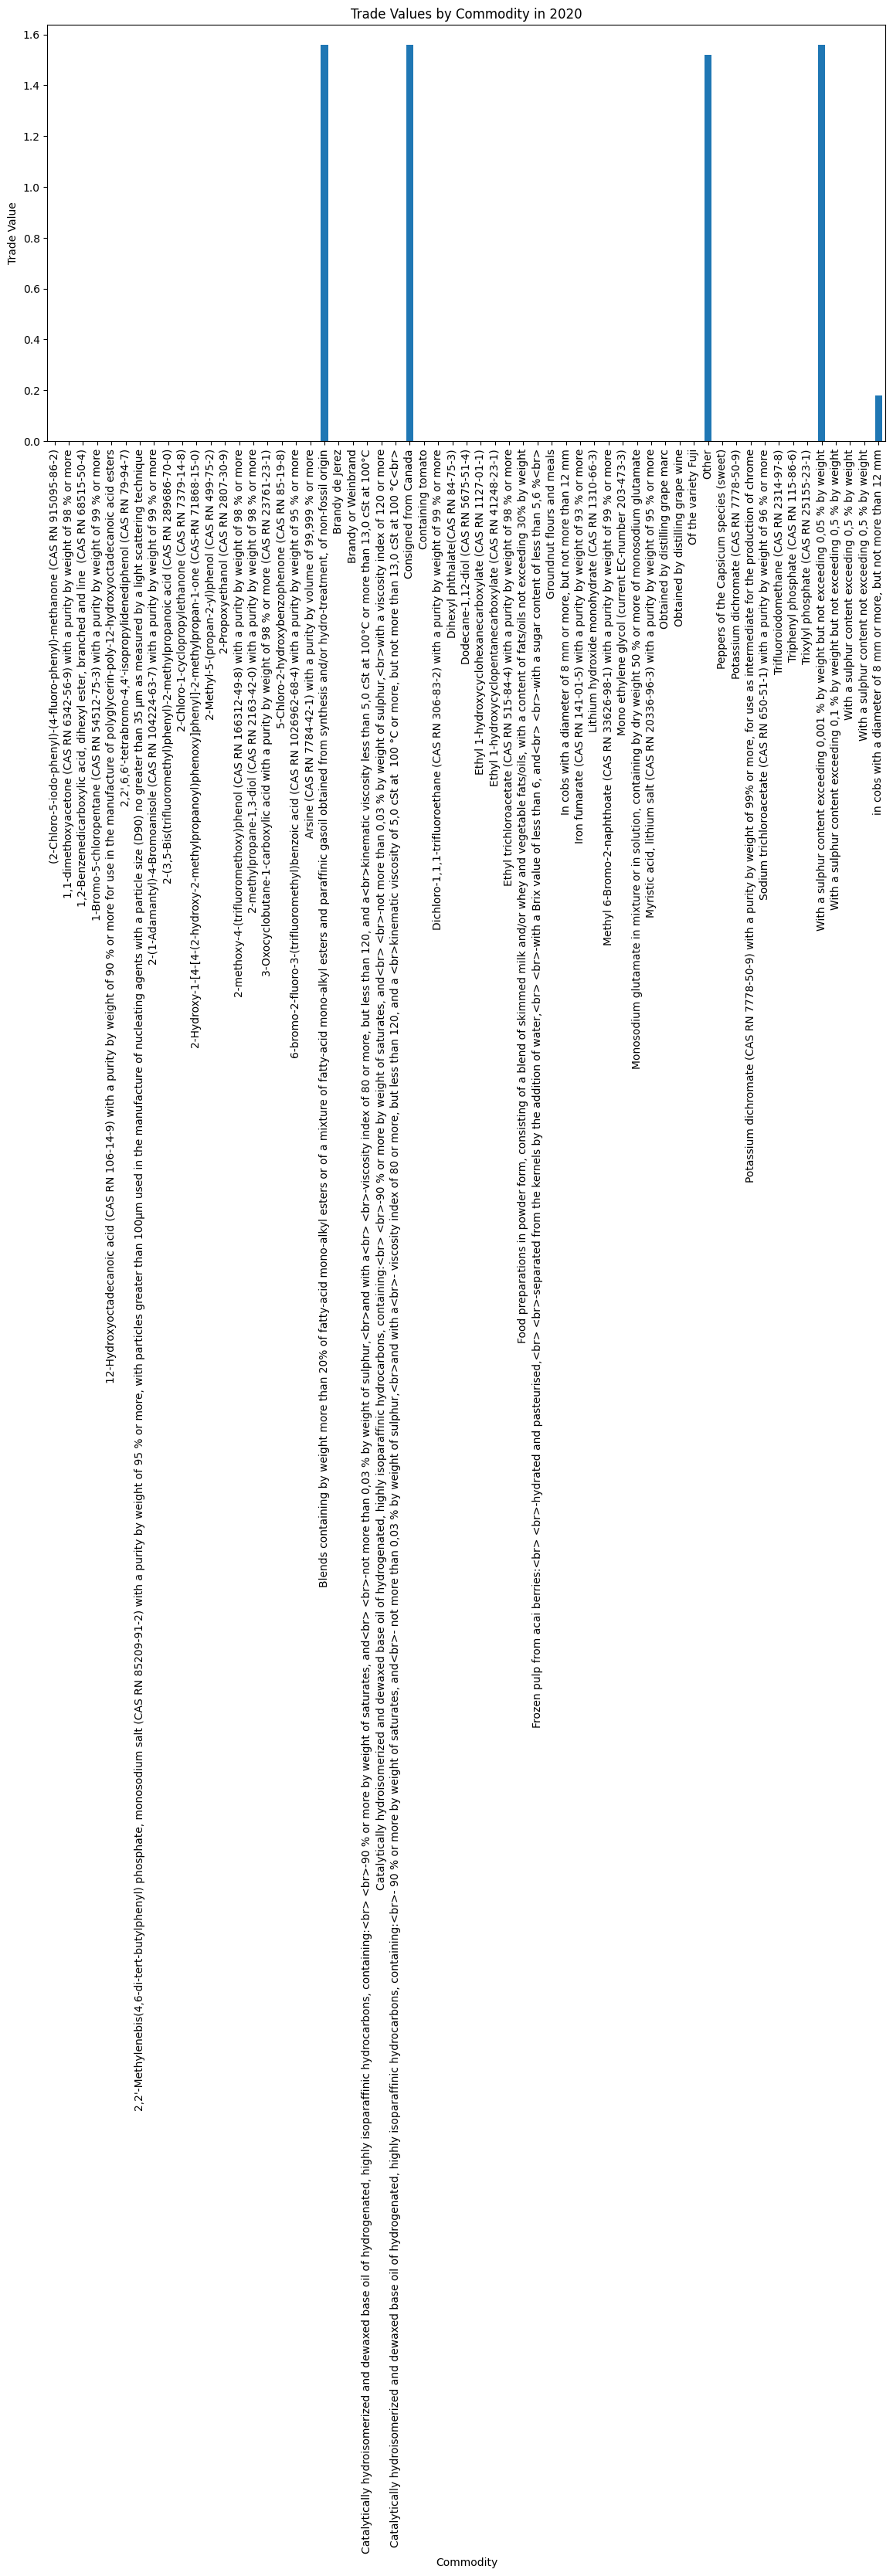

In [ ]:
# 2. Bar Chart: Compare trade values of different commodities for a specific year
specific_year = 2020
year_data = MSC_data_South_America[MSC_data_South_America['commodity__validity_year'].dt.year == specific_year]
commodity_trade_value = year_data.groupby('commodity__description')['measure__duty_expression'].sum()

plt.figure(figsize=(14, 7))
commodity_trade_value.plot(kind='bar')
plt.title(f'Trade Values by Commodity in {specific_year}')
plt.xlabel('Commodity')
plt.ylabel('Trade Value')
plt.xticks(rotation=90)
plt.show()

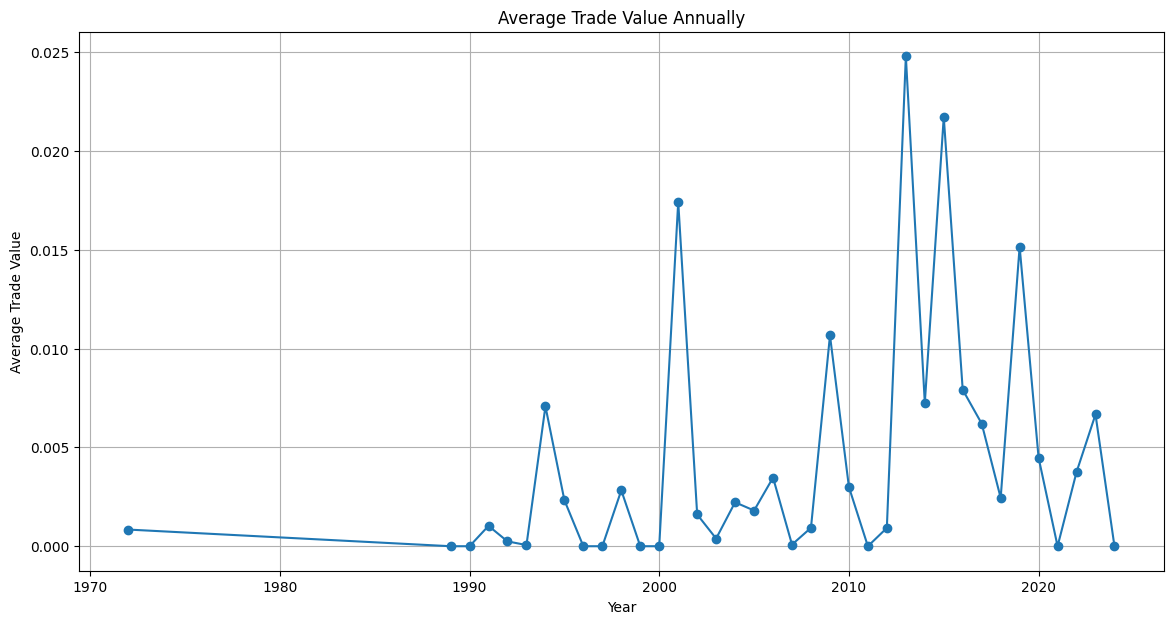

In [ ]:
annual_avg_trade_value = MSC_data_South_America.groupby('commodity__validity_year')['measure__duty_expression'].mean()

# Plot the average trade value annually
plt.figure(figsize=(14, 7))
plt.plot(annual_avg_trade_value.index, annual_avg_trade_value.values, marker='o')
plt.title('Average Trade Value Annually')
plt.xlabel('Year')
plt.ylabel('Average Trade Value')
plt.grid(True)
plt.show()

In [ ]:
MSC_data_South_America['commodity__description'].value_counts().head(12)

commodity__description
Other                                                                                                                                                                      26767
Consigned from Canada                                                                                                                                                       1500
Powdered                                                                                                                                                                    1230
Of an actual alcoholic strength by volume not exceeding 13 % vol                                                                                                            1144
Of an actual alcoholic strength by volume exceeding 13 % vol but not exceeding 15 % vol                                                                                     1038
Blends containing by weight more than 20% of fatty-acid mono-alkyl esters and/or paraffinic 

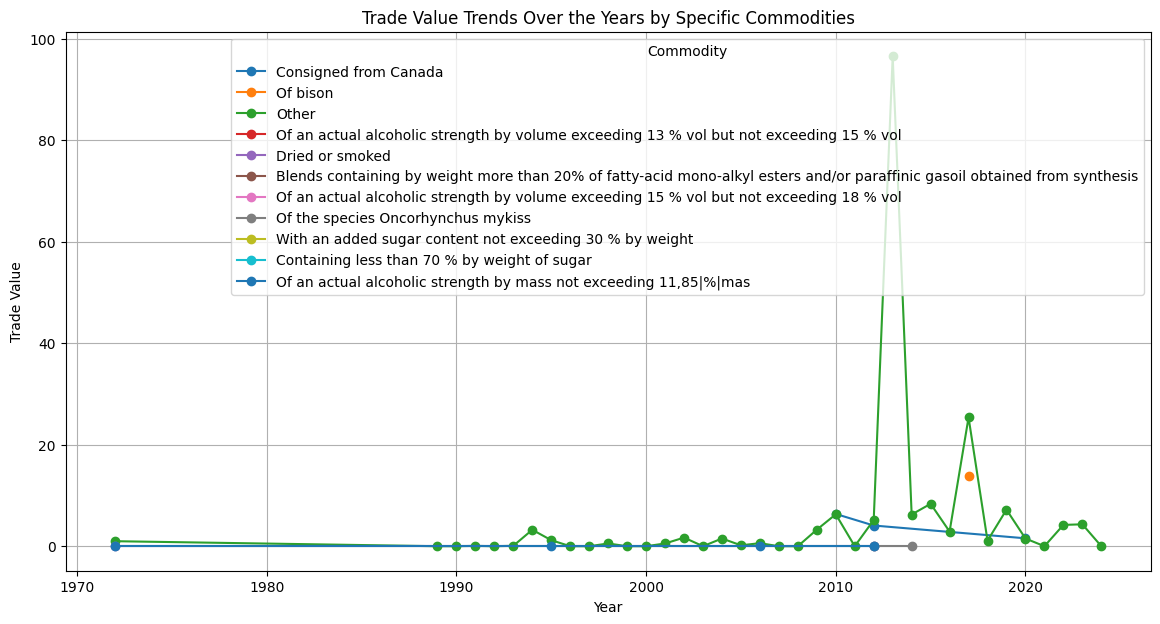

In [ ]:
# List of specific commodities to analyze
commodities_to_analyze = ['Consigned from Canada', 'Of bison', 'Other', 'Of an actual alcoholic strength by volume exceeding 13 % vol but not exceeding 15 % vol', 'Dried or smoked', 'Blends containing by weight more than 20% of fatty-acid mono-alkyl esters and/or paraffinic gasoil obtained from synthesis', 'Of an actual alcoholic strength by volume exceeding 15 % vol but not exceeding 18 % vol', 'Of the species Oncorhynchus mykiss', 'With an added sugar content not exceeding 30 % by weight ', 'Containing less than 70 % by weight of sugar', 'Of an actual alcoholic strength by mass not exceeding 11,85|%|mas']

# Filter data for specific commodities
filtered_df = MSC_data_South_America[MSC_data_South_America['commodity__description'].isin(commodities_to_analyze)]

# 1. Line Chart: Trade value trends over the years for each specific commodity
plt.figure(figsize=(14, 7))
for commodity in commodities_to_analyze:
    commodity_data = filtered_df[filtered_df['commodity__description'] == commodity]
    annual_trade_value = commodity_data.groupby(commodity_data['commodity__validity_year'].dt.year)['measure__duty_expression'].sum()
    plt.plot(annual_trade_value.index, annual_trade_value.values, marker='o', label=commodity)
plt.title('Trade Value Trends Over the Years by Specific Commodities')
plt.xlabel('Year')
plt.ylabel('Trade Value')
plt.legend(title='Commodity')
plt.grid(True)
plt.show()

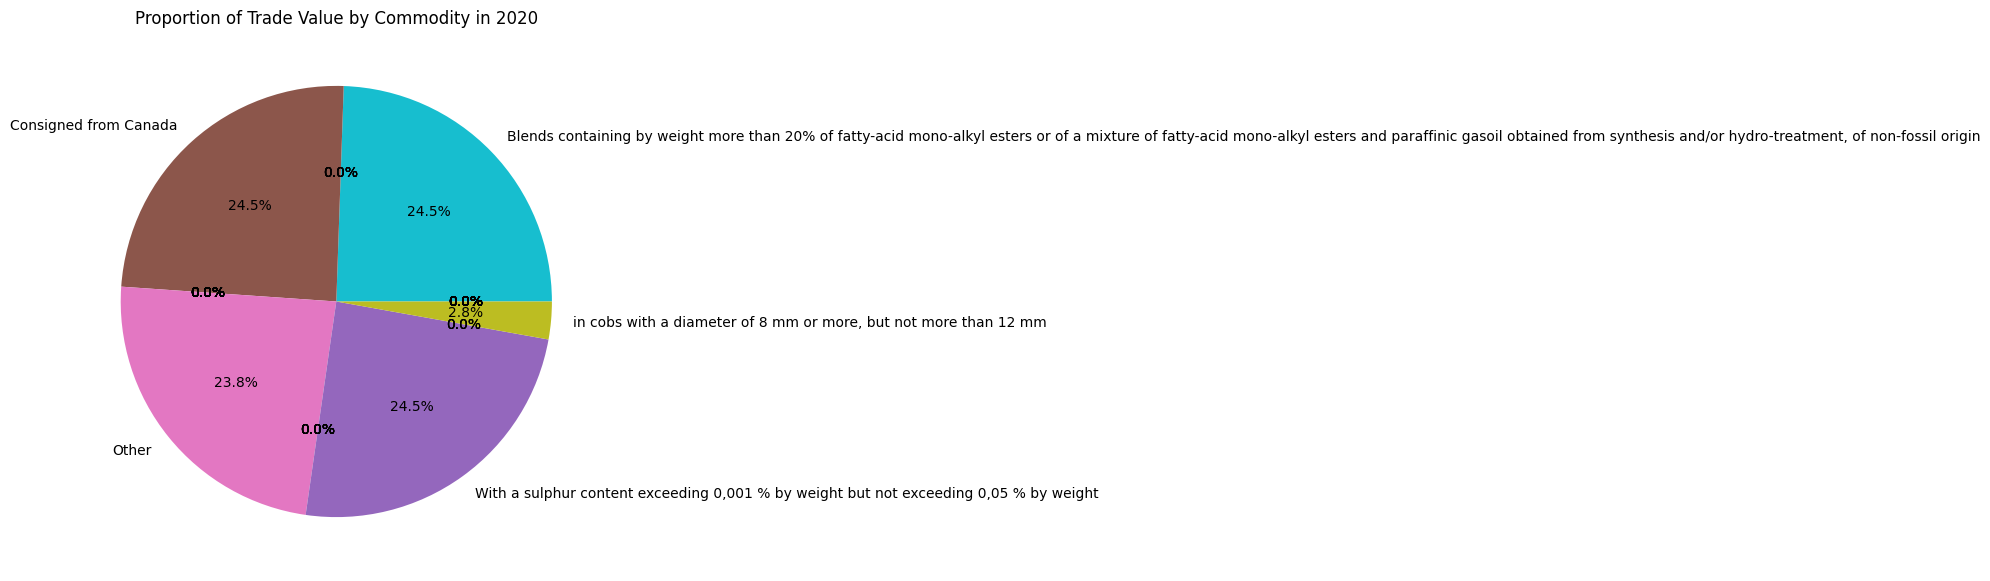

In [ ]:

# Plot 3: Pie Chart - Proportion of trade value by commodity for a specific year
plt.figure(figsize=(14, 7))
commodity_trade_value.plot(kind='pie', autopct='%1.1f%%')
plt.title(f'Proportion of Trade Value by Commodity in {specific_year}')
plt.ylabel('')
plt.show()

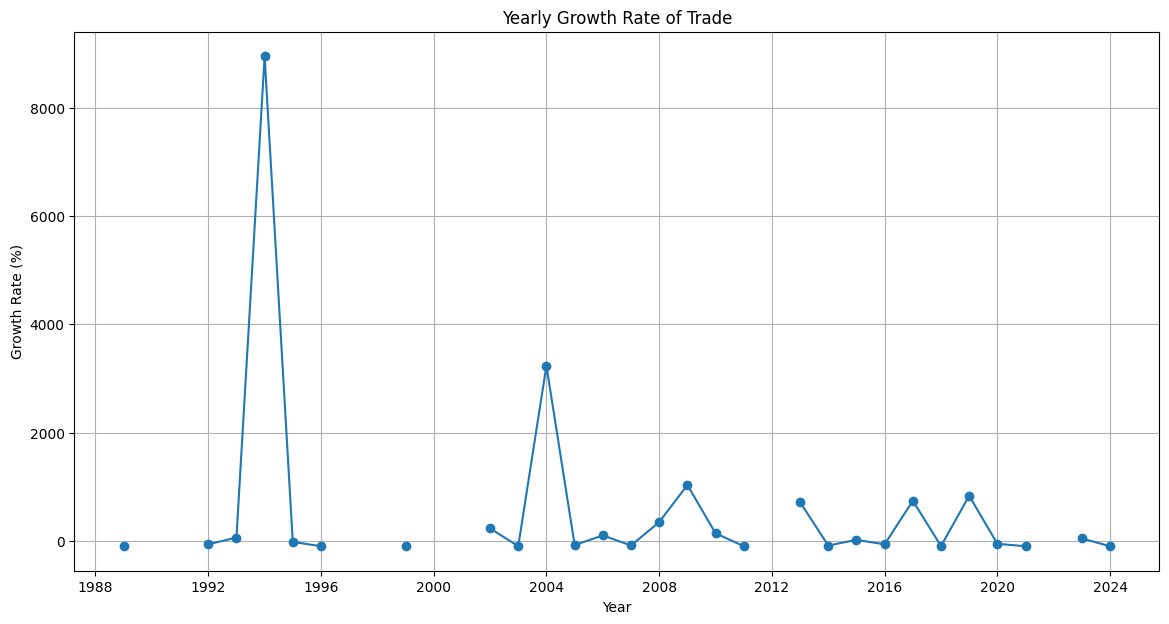

In [ ]:
# Calculate the annual trade value
annual_trade_value = MSC_data_South_America.groupby('commodity__validity_year')['measure__duty_expression'].sum()

# Calculate the yearly growth rate
annual_growth_rate = annual_trade_value.pct_change() * 100

# Plot the yearly growth rate
plt.figure(figsize=(14, 7))
plt.plot(annual_growth_rate.index, annual_growth_rate.values, marker='o')
plt.title('Yearly Growth Rate of Trade')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()

# ***Objective 1: Predict Trade Volume Based on Tariff Rates for South America***

In [ ]:

X = MSC_data_South_America.drop(columns=['measure__duty_expression'])
y = MSC_data_South_America['measure__duty_expression']

In [ ]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [ ]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

In [ ]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Define and train the model
models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}
results = {}
confusion_matrices = {}
accuracies = {}

In [ ]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['measure__type__description', 'commodity__suffix',
                       'commodity__validity_start', 'commodity__description',
                       'measure__geographical_area__description']

for column in categorical_columns:
    le = LabelEncoder()
    MSC_data_South_America[column] = le.fit_transform(MSC_data_South_America[column])
    label_encoders[column] = le


In [ ]:
# Encode categorical variables
for column in categorical_columns:
    le = LabelEncoder()
    MSC_data_South_America[column] = le.fit_transform(MSC_data_South_America[column])

# Select features and target
X = MSC_data_South_America.drop(['measure__duty_expression'], axis=1)
y = MSC_data_South_America['measure__duty_expression']

# Check for datetime columns and convert them to numerical representation
for col in X.columns:
    if X[col].dtype == 'datetime64[ns]':
        X[col] = X[col].astype('int64')  # Convert datetime to Unix timestamp (integer)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate the models
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    results[name] = {'Mean Squared Error': mse, 'R^2 Score': r2}
results_df = pd.DataFrame(results).T
results_df

,Mean Squared Error,R^2 Score
Linear Regression,0.000634,0.019872
Random Forest Regression,0.000021,0.967134
Gradient Boosting Regression,0.000170,0.737330


# ***Objective 2: Classify Commodities Based on Tariff Categories for South America***

In [ ]:
# Encode categorical columns using LabelEncoder
label_encoders = {}
categorical_columns = ['measure__type__description', 'commodity__suffix',
                       'commodity__validity_start', 'commodity__description',
                       'measure__geographical_area__description', 'measure__duty_expression']

for column in categorical_columns:
    le = LabelEncoder()
    MSC_data_South_America[column] = le.fit_transform(MSC_data_South_America[column])
    label_encoders[column] = le

In [ ]:
# Features and target variable
X = MSC_data_South_America.drop(columns=['commodity__suffix'])
y = MSC_data_South_America['commodity__suffix']

In [ ]:
# Identify datetime columns
datetime_cols = X.select_dtypes(include=['datetime64']).columns

# Convert datetime columns to numerical features (e.g., Unix timestamp)
for col in datetime_cols:
    X[col] = (X[col] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [ ]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt}')

Decision Tree Accuracy: 0.9982297671462939


In [ ]:
# Train the k-NN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(f'k-NN Accuracy: {accuracy_knn * 100}')

k-NN Accuracy: 84.19953701602287


In [ ]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_knn = accuracy_score(y_test, y_pred_rf)
conf_matrix_knn = confusion_matrix(y_test, y_pred_rf)
print(f'Random Forest model Accuracy: {accuracy_knn * 100}')

Random Forest model Accuracy: 99.23289909672734


In [ ]:
# Store confusion matrices in a dictionary for easy display
confusion_matrices = {
    'Decision Tree': confusion_matrix_dt,
    'k-NN': confusion_matrix_knn,
    'RF': confusion_matrix_rf
}

In [ ]:
for name, matrix in confusion_matrices.items():
    print(f"{name} Confusion Matrix:\n{matrix}\n")

Decision Tree Confusion Matrix:
[[ 4055     0     0     0    23]
 [    0   606     0     0     0]
 [    0     0   107     0     0]
 [    0     0     0     6     0]
 [   16     0     0     0 17218]]

k-NN Confusion Matrix:
[[ 1990    64     4     0  2020]
 [  155   256    11     0   184]
 [   18    16    34     0    39]
 [    6     0     0     0     0]
 [  870    86     8     0 16270]]

RF Confusion Matrix:
[[ 3941     3     0     0   134]
 [    0   605     1     0     0]
 [    0     0   107     0     0]
 [    0     0     0     6     0]
 [   31     0     0     0 17203]]



In [ ]:

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print evaluation metrics
    print(f"{model_name} Model Evaluation:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Decision Tree Model Evaluation:
Precision: 0.9982
Recall: 0.9982
F1 Score: 0.9982


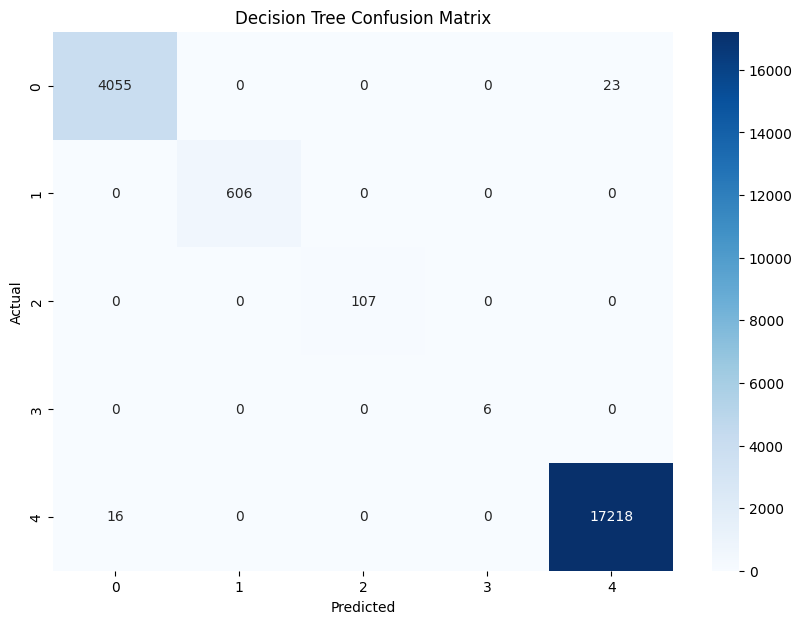

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_model, X_train, X_test, y_train, y_test, 'Decision Tree')

Random Forest Model Evaluation:
Precision: 0.9923
Recall: 0.9923
F1 Score: 0.9923


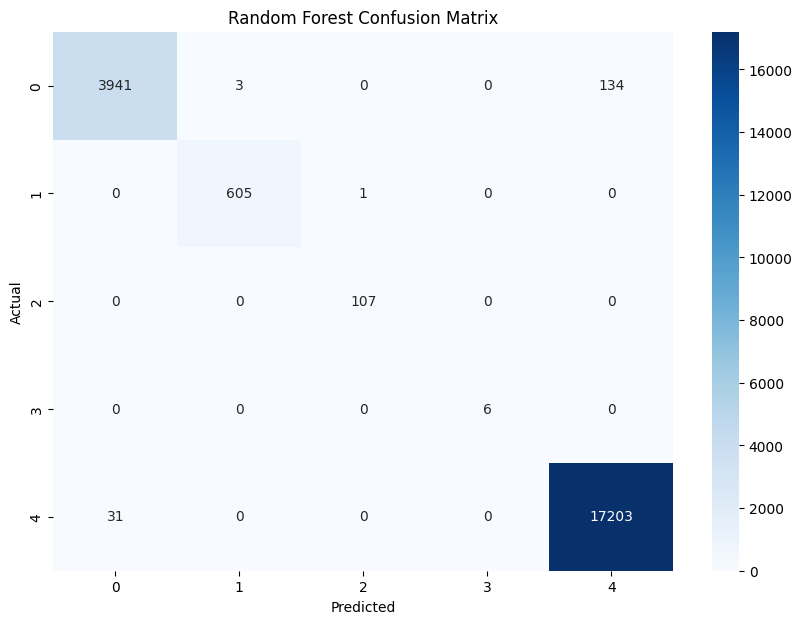

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
evaluate_model(rf_model, X_train, X_test, y_train, y_test, 'Random Forest')

k-NN Model Evaluation:
Precision: 0.8285
Recall: 0.8420
F1 Score: 0.8313


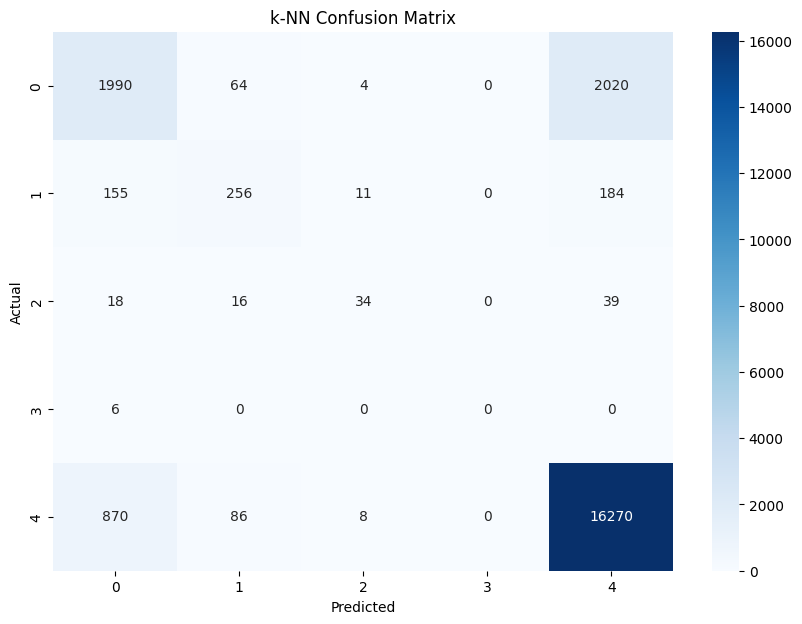

In [ ]:
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train, X_test, y_train, y_test, 'k-NN')

# ***Objective 3: Cluster Commodities with Similar Tariff Structures for South America***

In [ ]:
MSC_data_South_America.head()

,commodity__code,measure__sid,measure__type__description,commodity__indent,commodity__suffix,commodity__validity_start,commodity__sid,commodity__description,measure__geographical_area__sid,measure__geographical_area__description,measure__duty_expression,commodity__validity_year
0,101210000,20000000,49,2,0,78,93797,1191,205,2,0,2012-01-01
1,101210000,20000000,49,2,0,78,93797,1191,322,3,0,2012-01-01
2,101210000,20000000,49,2,0,78,93797,1191,326,4,0,2012-01-01
3,101210000,20000000,49,2,0,78,93797,1191,141,5,0,2012-01-01
4,101210000,20000000,49,2,4,78,93796,2007,205,2,0,2012-01-01


In [ ]:
cols = ['commodity__code','measure__duty_expression']
MSC_data_South_America1 =  MSC_data_South_America[cols]

In [ ]:
WCSS = []
for i in range(1,10):
  kn = KMeans(n_clusters=i)
  kn.fit(MSC_data_South_America1)
  WCSS.append(kn.inertia_)

In [ ]:
WCSS

[2.075055747463978e+23,
 4.9061071887351165e+22,
 6.856715088945639e+21,
 4.4225337839644395e+21,
 2.3823408885928045e+21,
 9.271232134987071e+20,
 6.54606008907917e+20,
 4.9431235021114114e+20,
 3.735642537269217e+20]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

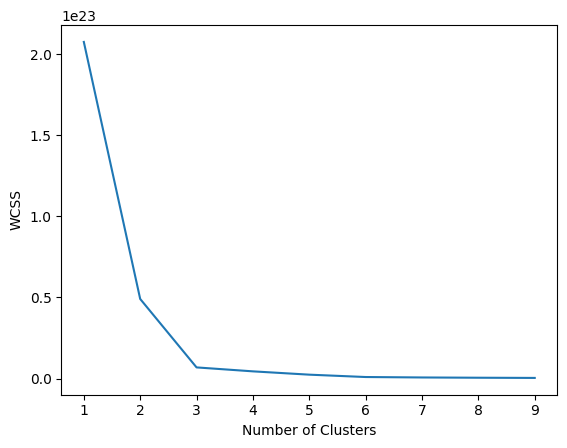

In [ ]:
plt.plot(range(1,10),WCSS)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt

In [ ]:
x = MSC_data_South_America1.iloc[:,:].values
km = KMeans(n_clusters=3)
y_mean = km.fit_predict(x)

In [ ]:
y_mean

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

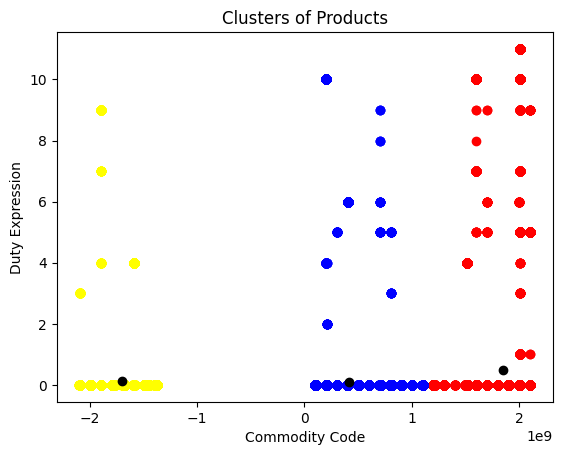

In [ ]:
plt.scatter(x[y_mean == 0,0],x[y_mean == 0,1], color = 'red')
plt.scatter(x[y_mean == 1,0],x[y_mean == 1,1], color = 'blue')
plt.scatter(x[y_mean == 2,0],x[y_mean == 2,1], color = 'yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'black')
plt.title('Clusters of Products')
plt.xlabel('Commodity Code')
plt.ylabel('Duty Expression')
plt.show()

# ***4. Forecast Future Tariff Rates and Trade Volumes for South America***

In [ ]:
# Select relevant features
selected_columns = [
    'commodity__code',
    'measure__geographical_area__description',
    'measure__duty_expression',
    'commodity__validity_start'
]

In [ ]:
MSC_data_South_America_selected = MSC_data_South_America[selected_columns]

In [ ]:
label_encoder = LabelEncoder()
scaler = MinMaxScaler()
MSC_data_South_America['measure__geographical_area__description'] = label_encoder.fit_transform(MSC_data_South_America['measure__geographical_area__description'])
MSC_data_South_America[['commodity__code', 'measure__duty_expression']] = scaler.fit_transform(MSC_data_South_America[['commodity__code', 'measure__duty_expression']])
MSC_data_South_America.sort_values('commodity__validity_start', inplace=True)

In [ ]:
# Prepare data for LSTM
sequence_length = 10
def create_sequences(MSC_data_South_America, seq_length):
    xs, ys = [], []
    for i in range(len(MSC_data_South_America) - seq_length):
        x = MSC_data_South_America[i:i+seq_length]
        y = MSC_data_South_America[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

model_data = MSC_data_South_America[['commodity__code', 'measure__geographical_area__description', 'measure__duty_expression']].values
X, y = create_sequences(model_data, sequence_length)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build and train the improved LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(sequence_length, 3)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50)))
model.add(Dropout(0.2))
model.add(Dense(3))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr])


Epoch 1/25
1102/1102 [==============================] - 39s 35ms/step - loss: 0.4063 - val_loss: 0.3661 - lr: 0.0010
Epoch 2/25
1102/1102 [==============================] - 36s 32ms/step - loss: 0.3736 - val_loss: 0.3380 - lr: 0.0010
Epoch 3/25
1102/1102 [==============================] - 36s 33ms/step - loss: 0.3435 - val_loss: 0.3069 - lr: 0.0010
Epoch 4/25
1102/1102 [==============================] - 33s 30ms/step - loss: 0.3229 - val_loss: 0.2966 - lr: 0.0010
Epoch 5/25
1102/1102 [==============================] - 35s 32ms/step - loss: 0.3117 - val_loss: 0.2846 - lr: 0.0010
Epoch 6/25
1102/1102 [==============================] - 33s 30ms/step - loss: 0.3040 - val_loss: 0.2789 - lr: 0.0010
Epoch 7/25
1102/1102 [==============================] - 38s 35ms/step - loss: 0.2970 - val_loss: 0.2790 - lr: 0.0010
Epoch 8/25
1102/1102 [==============================] - 35s 31ms/step - loss: 0.2940 - val_loss: 0.2718 - lr: 0.0010
Epoch 9/25
1102/1102 [==============================] - 35s 32ms

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

689/689 [==============================] - 9s 13ms/step - loss: 0.2659
Test Loss: 0.26594188809394836


In [ ]:
# Make predictions
predictions = model.predict(X_test)

689/689 [==============================] - 12s 14ms/step


In [ ]:
# Example: Display the first 5 predictions and actual values
for i in range(5):
    print(f'Prediction: {predictions[i]}, Actual: {y_test[i]}')

Prediction: [7.9650307e-01 4.1858568e+00 3.2000896e-03], Actual: [0.73845312 5.         0.        ]
Prediction: [0.70703506 3.2586346  0.00446575], Actual: [0.54846894 5.         0.        ]
Prediction: [ 0.662465    3.7870574  -0.00609713], Actual: [0.57132686 4.         0.        ]
Prediction: [ 1.0592633   4.7376347  -0.00984378], Actual: [0.97669031 5.         0.        ]
Prediction: [1.0126469  2.9998498  0.01011695], Actual: [0.97652673 5.         0.        ]


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
# Calculate MAE, RMSE, and MAPE
def calculate_metrics(predictions, actuals):
    mae = np.mean(np.abs(predictions - actuals))
    rmse = np.sqrt(np.mean((predictions - actuals) ** 2))

    # Handling division by zero in MAPE calculation
    non_zero_actuals = np.where(actuals != 0, actuals, np.nan)
    mape = np.nanmean(np.abs((predictions - non_zero_actuals) / non_zero_actuals)) * 100

    return mae, rmse, mape

In [ ]:
mae, rmse, mape = calculate_metrics(predictions, y_test)
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

MAE: 0.2389221681124955
RMSE: 0.5156956572077364
MAPE: 509.3788997684178%
